# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install gensim

  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.1
    Uninstalling pydantic_core-2.33.1:
      Successfully uninstalled pydantic_core-2.33.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.3
    Uninstalling pydantic-2.11.3:
      Successfully uninstalled pydantic-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires scipy>=1.10.0, which is not installed.
fastai 2.7.19 requires scipy, which is not installed.


## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('stopwords')

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

from wordcloud import WordCloud

import gensim.downloader

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [94]:
# Import the first file - True.csv
true_df = pd.read_csv("True.csv")

# Import the second file - Fake.csv
fake_df = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [95]:
# Inspect the DataFrame with True News to understand the given data
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [96]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [97]:
# Print the column details for True News DataFrame
true_df.head()

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [98]:
# Print the column details for Fake News Dataframe
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [99]:
# Print the column names of both DataFrames
print("True.csv column names: ", true_df.columns.tolist())
print("Fake.csv column names: ", fake_df.columns.tolist())

True.csv column names:  ['title', 'text', 'date']
Fake.csv column names:  ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [100]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df["news_label"] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df["news_label"] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [101]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([true_df, fake_df], ignore_index=True)

In [102]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head(5)

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [104]:
# Check Presence of Null Values
for c in df.columns:
  print(c, df[c].isnull().sum())

title 21
text 21
date 42
news_label 0


In [105]:
# Handle Rows with Null Values
for c in ['title', 'text']:
  df = df[df[c].notnull()]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44919 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44919 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [107]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + ' ' + df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
df = df.drop(columns=['title', 'text', 'date'])

# Display the first 5 rows of the updated DataFrame to check the result
df.head(5)

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


 # filter ----------------------------

In [108]:
# prompt: random shuffle df and select 1000 rows

# Assuming 'df' is the DataFrame from the previous code.
#df = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame
#df = df.head(1000)  # Select the first 1000 rows
#df.shape


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [109]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame(columns=['news_text', 'news_text_lemma'])

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df['news_label']

In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44919 entries, 0 to 44939
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        0 non-null      object
 1   news_text_lemma  0 non-null      object
 2   news_label       44919 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [111]:
# Write the function here to clean the text and remove all the unnecessary elements

def clean_text(text):

  # Convert to lower case
  text = text.lower()

  # Remove text in square brackets
  text = re.sub('\[.*?\]', '', text)

  # Remove punctuation
  # re.escape ensures special characters are treated literally in the regex
  # string.punctuation is !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

  # Remove words with numbers
  text = re.sub('\w*\d\w*', '', text)
  return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [112]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['news_text'] = df['news_text'].apply(clean_text)
df_clean['news_text'].head()

,news_text
0,as us budget fight looms republicans flip thei...
1,us military to accept transgender recruits on ...
2,senior us republican senator let mr mueller do...
3,fbi russia probe helped by australian diplomat...
4,trump wants postal service to charge much more...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [114]:
def pos_filter_and_lemmatizer(text):
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()

  # Tokenize and POS tag
  tokens = word_tokenize(text)
  tagged_tokens = pos_tag(tokens)

  # Filter tokens: only NN and NNS tags, not in stopwords
  filtered_lemmas = [ lemmatizer.lemmatize(token, pos='n')
                        for token, tag in tagged_tokens
                          if tag in ('NN', 'NNS') and token not in stop_words
                    ]

  return ' '.join(filtered_lemmas)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [117]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['news_text_lemma'] = df_clean['news_text'].progress_apply(pos_filter_and_lemmatizer)
df_clean.head()

100%|██████████| 44919/44919 [14:42<00:00, 50.91it/s]


,news_text,news_text_lemma,news_label
0,as us budget fight looms republicans flip thei...,budget fight republican script washington head...,1
1,us military to accept transgender recruits on ...,transgender recruit monday washington reuters ...,1
2,senior us republican senator let mr mueller do...,senator job washington counsel investigation l...,1
3,fbi russia probe helped by australian diplomat...,fbi russia probe diplomat tipoff washington re...,1
4,trump wants postal service to charge much more...,trump service amazon shipment reuters presiden...,1


### Save the Cleaned data as a csv file (Recommended)

In [118]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)

In [2]:
df_clean = pd.read_csv("clean_df.csv")

In [3]:
# Check the first few rows of the DataFrame
df_clean.head()

,news_text,news_text_lemma,news_label
0,as us budget fight looms republicans flip thei...,budget fight republican script washington head...,1
1,us military to accept transgender recruits on ...,transgender recruit monday washington reuters ...,1
2,senior us republican senator let mr mueller do...,senator job washington counsel investigation l...,1
3,fbi russia probe helped by australian diplomat...,fbi russia probe diplomat tipoff washington re...,1
4,trump wants postal service to charge much more...,trump service amazon shipment reuters presiden...,1


In [4]:
# Check the dimensions of the DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44919 non-null  object
 1   news_text_lemma  44910 non-null  object
 2   news_label       44919 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum()

,0
news_text,0
news_text_lemma,9
news_label,0


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [4]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [7]:
# Add a new column to calculate the character length of cleaned news text
train_df['len_news_text'] = train_df['news_text'].apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['len_news_text_lemma'] = train_df['news_text_lemma'].astype(str).apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

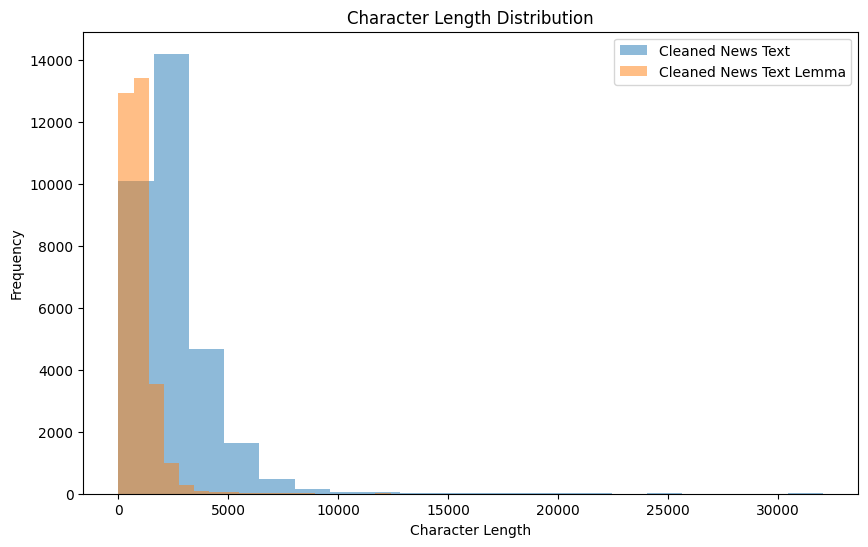

In [8]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(10, 6))

# Add histogram for cleaned news text
plt.hist(train_df['len_news_text'], bins=20, alpha=0.5, label='Cleaned News Text')

# Add histogram for lemmatized news text with POS tags removed
plt.hist(train_df['len_news_text_lemma'], bins=20, alpha=0.5, label='Cleaned News Text Lemma')

#print labels
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Character Length Distribution')
plt.legend()

plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

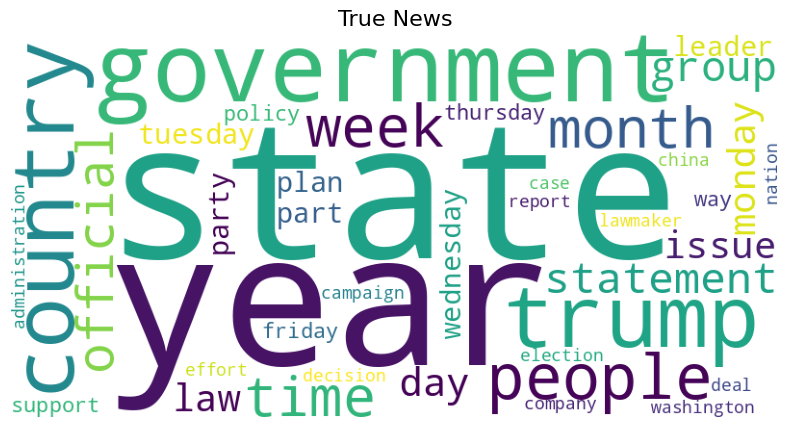

In [9]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = ' '.join(train_df[train_df['news_label'] == 1]['news_text_lemma'].astype(str))

# Generate word cloud for True News

# Create and configure word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=40  # Limit to top 40 words
                      ).generate(true_news_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("True News", fontsize=16)
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

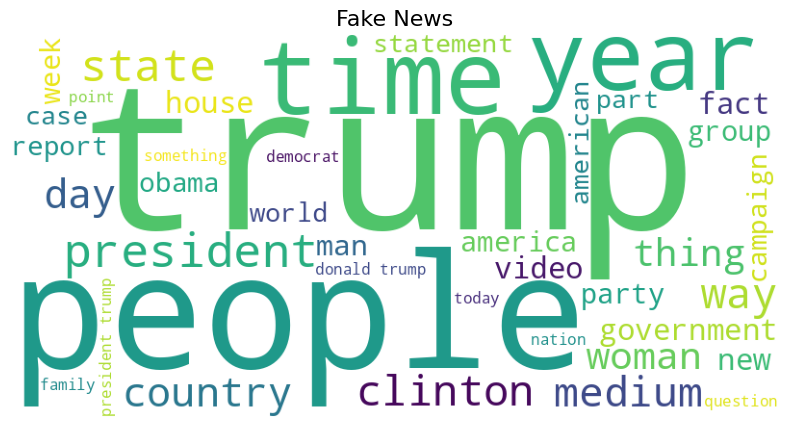

In [10]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = ' '.join(train_df[train_df['news_label'] == 0]['news_text_lemma'].astype(str))

# Generate word cloud for Fake News

# Create and configure word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=40  # Limit to top 40 words
                      ).generate(fake_news_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Fake News", fontsize=16)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [11]:
# Write a function to get the specified top n-grams

def get_top_ngrams(df, column, ngram_range=(1, 1), top_n=10):
    """
    Get the top n-grams from a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the text column.
        ngram_range (tuple): The range of n-gram sizes (e.g., (1, 1) for unigrams, (2, 2) for bigrams).
        top_n (int): Number of top n-grams to return.

    Returns:
        pd.DataFrame: A DataFrame with n-grams and their frequencies.
    """
    # Combine all text into one large string
    text_data = df[column].dropna().astype(str).values

    # Initialize the CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_data)

    # Sum up the counts of each n-gram
    ngram_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    freq_distribution = pd.DataFrame({'ngram': vocab, 'frequency': ngram_counts})

    # Sort and return top n
    return freq_distribution.sort_values(by='frequency', ascending=False).head(top_n).reset_index(drop=True)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [12]:
# Handle NaN values in the text data


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

        ngram  frequency
0       trump      32623
1       state      25390
2   president      19147
3     reuters      16526
4  government      13832
5        year      13186
6       house      12719
7       party      10827
8      people      10729
9    election      10174


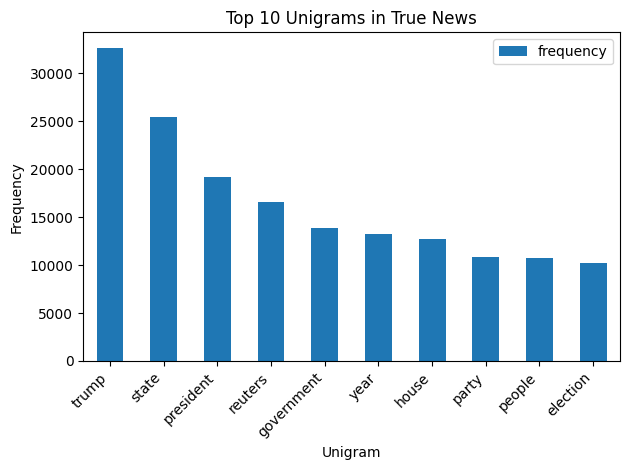

In [13]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top10_ngrams = get_top_ngrams(train_df[train_df['news_label'] == 1], 'news_text_lemma', ngram_range=(1, 1), top_n=10)
print(top10_ngrams)

top10_ngrams.plot(kind='bar', x='ngram', y='frequency')
plt.title("Top 10 Unigrams in True News")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                  ngram  frequency
0          donald trump       2005
1          barack obama       1982
2      president barack       1941
3    washington reuters       1926
4     reuters president       1852
5       president trump       1849
6      president donald       1732
7       secretary state       1605
8  house representative       1589
9      state department       1346


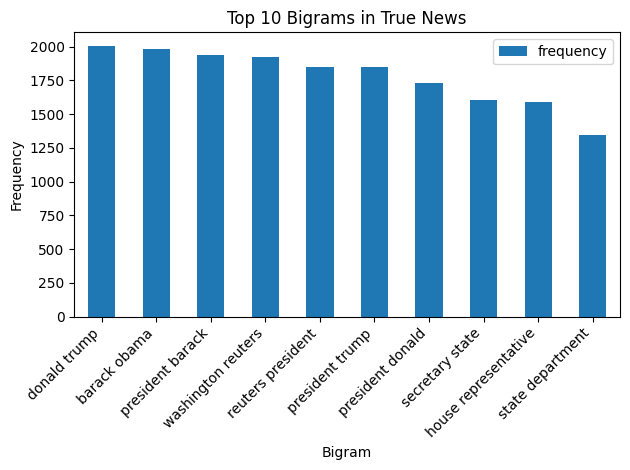

In [14]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top10_ngrams = get_top_ngrams(train_df[train_df['news_label'] == 1], 'news_text_lemma', ngram_range=(2, 2), top_n=10)
print(top10_ngrams)

top10_ngrams.plot(kind='bar', x='ngram', y='frequency')
plt.title("Top 10 Bigrams in True News")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                          ngram  frequency
0        president barack obama       1746
1        president donald trump        777
2  washington reuters president        560
3       reuters president trump        551
4           secretary state rex        465
5           state rex tillerson        453
6      president vladimir putin        448
7             speaker paul ryan        374
8        leader mitch mcconnell        345
9      chancellor angela merkel        332


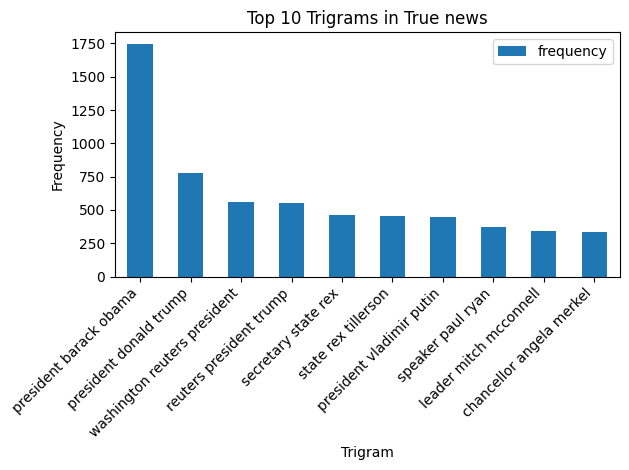

In [15]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top10_ngrams = get_top_ngrams(train_df[train_df['news_label'] == 1], 'news_text_lemma', ngram_range=(3, 3), top_n=10)
print(top10_ngrams)

top10_ngrams.plot(kind='bar', x='ngram', y='frequency')
plt.title("Top 10 Trigrams in True news")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

       ngram  frequency
0      trump      47749
1  president      19022
2     people      18658
3      state      15405
4    clinton      13114
5       time      12757
6       year      10616
7       news      10569
8      image       9946
9      obama       8700


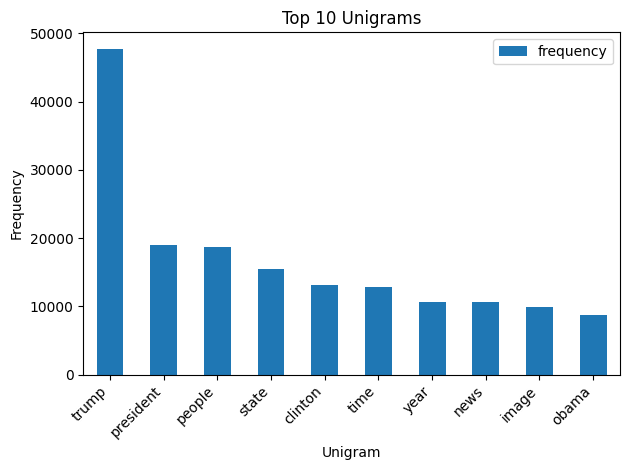

In [16]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top10_ngrams = get_top_ngrams(train_df[train_df['news_label'] == 0], 'news_text_lemma', ngram_range=(1, 1), top_n=10)
print(top10_ngrams)

top10_ngrams.plot(kind='bar', x='ngram', y='frequency')
plt.title("Top 10 Unigrams")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                   ngram  frequency
0           donald trump       3743
1        president trump       2949
2        president obama       1872
3         trump campaign       1444
4           century wire       1310
5        trump supporter       1309
6           barack obama       1248
7  trump realdonaldtrump       1140
8       state department       1122
9        secretary state       1108


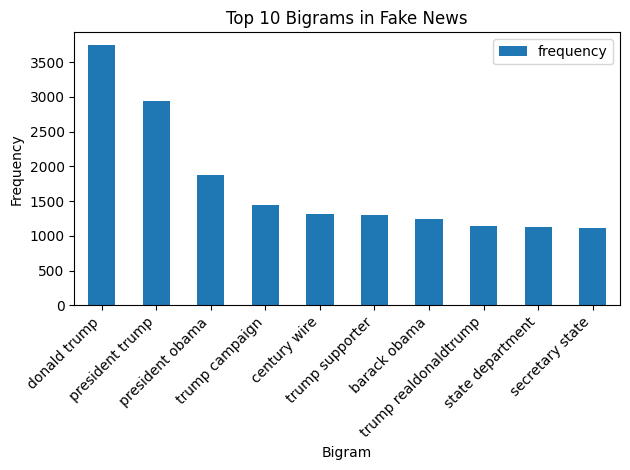

In [17]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top10_ngrams = get_top_ngrams(train_df[train_df['news_label'] == 0], 'news_text_lemma', ngram_range=(2, 2), top_n=10)
print(top10_ngrams)

top10_ngrams.plot(kind='bar', x='ngram', y='frequency')
plt.title("Top 10 Bigrams in Fake News")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                          ngram  frequency
0             news century wire        648
1  donald trump realdonaldtrump        545
2        president barack obama        516
3            image video screen        420
4          video screen capture        399
5        president donald trump        211
6  department homeland security        196
7         house press secretary        180
8       secretary state clinton        172
9              image chip image        171


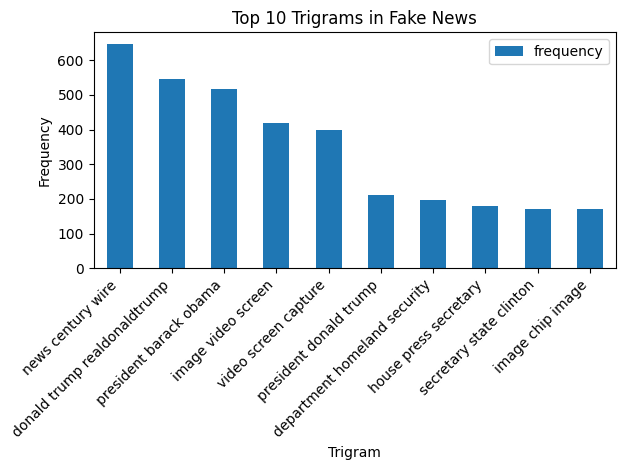

In [18]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top10_ngrams = get_top_ngrams(train_df[train_df['news_label'] == 0], 'news_text_lemma', ngram_range=(3, 3), top_n=10)
print(top10_ngrams)

top10_ngrams.plot(kind='bar', x='ngram', y='frequency')
plt.title("Top 10 Trigrams in Fake News")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [5]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

# Load the pre-trained Word2Vec model
model = gensim.downloader.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [18]:
def df2vec(df, col, model):
    """
    Convert a column of text data in a DataFrame to sentence vectors using a pre-trained word embedding model.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the text data.
    col : str
        The name of the column in the DataFrame that contains sentences to be vectorized.
    model : gensim.models.KeyedVectors or similar
        A pre-trained word embedding model that supports word lookup (e.g., Word2Vec, FastText).

    Returns:
    --------
    numpy.ndarray
        A 2D numpy array where each row corresponds to the vector representation of a sentence.
    """
    sentence_vectors = []

    for i, sentence in enumerate(df[col]):
        word_vectors = []
        # Tokenize the sentence into words
        for word in word_tokenize(str(sentence)):
            # If the word exists in the model vocabulary, get its vector
            if word in model:
                word_vectors.append(model[word])

        # Compute mean of word vectors to form sentence vector
        if word_vectors:
            sentence_vec = np.mean(word_vectors, axis=0)
        else:
            # If no known words, use a zero vector
            print("No known words!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print(i)
            print(sentence)
            sentence_vec = np.zeros(model.vector_size)

        sentence_vectors.append(sentence_vec)

    return np.array(sentence_vectors)


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [19]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
X_train = df2vec(train_df, 'news_text_lemma', model)
X_test = df2vec(val_df, 'news_text_lemma', model)

## Extract the target variable for the training data and validation data
y_train = train_df['news_label']
y_test = val_df['news_label']


No known words!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
8693
absence… ’ ”
No known words!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
8964
why…trumpocrats


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31443, 300)
(13476, 300)
(31443,)
(13476,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [10]:
## Initialise Logistic Regression model
lr_model = LogisticRegression()

## Train Logistic Regression model on training data

## grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best model
print("Best Score: : ", round(grid_search.best_score_, 2))
print ("Best params: ", grid_search.best_params_)
lr_model = grid_search.best_estimator_

## Predict on validation data
y_pred = lr_model.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Score: :  0.94
Best params:  {'C': 100, 'penalty': 'l2'}


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [11]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {round(accuracy, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"F1-score: {round(f1, 2)}")

Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1-score: 0.94


In [12]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6978
           1       0.93      0.94      0.94      6498

    accuracy                           0.94     13476
   macro avg       0.94      0.94      0.94     13476
weighted avg       0.94      0.94      0.94     13476



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [39]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier()

## Train Decision Tree model on training data
param_grid_dt = {
    #'criterion': ['gini', 'entropy', 'log_loss'],
    #'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best model
print("Best Score: : ", round(grid_search.best_score_, 2))
print ("Best params: ", grid_search.best_params_)
dt_model = grid_search.best_estimator_

## Predict on validation data
y_pred = dt_model.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score: :  0.83
Best params:  {}


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [40]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {round(accuracy, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"F1-score: {round(f1, 2)}")

Accuracy: 0.85
Precision: 0.86
Recall: 0.82
F1-score: 0.84


In [48]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6978
           1       0.94      0.91      0.92      6498

    accuracy                           0.93     13476
   macro avg       0.93      0.92      0.93     13476
weighted avg       0.93      0.93      0.93     13476



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [50]:
## Initialise Random Forest model
rf_model = RandomForestClassifier()

## Random Forrest Tree model on training data
param_grid_rf = {
    #'n_estimators': [100, 200, 500],
    #'criterion': ['gini', 'entropy', 'log_loss'],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['sqrt', 'log2', None],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best model
print("Best Score: : ", round(grid_search.best_score_, 2))
print ("Best params: ", grid_search.best_params_)
rf_model = grid_search.best_estimator_

## Predict on validation data
y_pred = rf_model.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score: :  0.92
Best params:  {}


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [51]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {round(accuracy, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"F1-score: {round(f1, 2)}")

Accuracy: 0.93
Precision: 0.94
Recall: 0.91
F1-score: 0.92


In [52]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6978
           1       0.94      0.91      0.92      6498

    accuracy                           0.93     13476
   macro avg       0.93      0.93      0.93     13476
weighted avg       0.93      0.93      0.93     13476



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.